# Spotify Dataset


## Workflow Stages

Some books define the workflow through the following stages:

1. Define the question or problem.
2. Acquire training and test data.
3. Discuss, prepare, clean the data.
4. Analyze, identify patterns, and explore the data.
5. Model, predict, and solve the problem.
6. Visualize, report, and present the steps for problem solving and the final solution.
7. Provide or submit the results.


## Goals


To infer from a training sample set that a track is going to be likeable, our model must determine based on a given test dataset, whether these tracks in the test dataset are liked or not.


Feature engineering broadly aims to solve the following goals:

**Correlation** The problem can be addressed based on the features available within the training set. Which features within the dataset contribute significantly to our solution goal? Statistically speaking, is there a correlation between a feature and a solution goal? As feature values ​​change, does the solution state change as well, and vice versa? This can be tested for both numerical and categorical features. We may also want to determine the correlation between features other than survival for subsequent goals and workflow stages. Correlating certain features can help create, complete, or correct features.

**Conversion** For the modeling stage, data preparation is required. Depending on the choice of model algorithm, all features may be required to be converted to equivalent numerical values. So, for example, converting categorical text values ​​to numerical values.

**Completion** Data preparation may also require us to estimate missing values ​​within a feature. Modeling algorithms can help us to estimate missing values ​​within a feature.

### Importing Libraries
In this step, we import the necessary libraries for data analysis, visualization, and modeling.

In [27]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE


### **1) Loading the Dataset**
Here, we load the Spotify dataset from a Google Drive link into a pandas DataFrame for further analysis.

In [28]:
#We import have the file in th drive so we import that
#We view the first 5 rows
spotify = '/Users/michellemendez/Desktop/MICHELLE-WS/DataAnalysis/Projects_/Spotify Analysis/data_playlist.csv'
df = pd.read_csv(spotify)

### **2) Exploring the Dataset**

For this EDA we are visualizing the first row, and I am taking a sample just to explore the data, after that we identify the type of data, so I can identify then as continuos or discrete, also we will identify if a variable is  informative to avoid classification process. 

#### What are the available variables?
We explore the structure of the dataset by examining the available variables and their data types.

In [29]:
df.head()

,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,label
0,0.713,0.514,100125,0.521,0.816000,8,0.1120,-14.835,0,0.0444,119.879,4,0.143,1
1,0.192,0.714,207019,0.614,0.000000,4,0.2630,-6.935,1,0.0319,123.969,4,0.582,1
2,0.333,0.630,216200,0.455,0.000004,5,0.1270,-9.290,1,0.0292,139.931,4,0.199,1
3,0.601,0.810,136413,0.221,0.210000,5,0.1840,-11.005,1,0.0429,109.960,4,0.798,1
4,0.883,0.465,181440,0.459,0.000173,6,0.0692,-8.137,0,0.0351,90.807,4,0.288,1


In [30]:
print(df.columns.values)

['acousticness' 'danceability' 'duration' 'energy' 'instrumentalness'
 'key' 'liveness' 'loudness' 'mode' 'speechiness' 'tempo' 'time_signature'
 'valence' 'label']


#### 2.1 Variable Identification 

**¿What are the numerical variables?**

Within the numerical characteristics, are the values ​​discrete, continuous, or based on time series? Among other things, this helps us select the appropriate charts for visualization.

- Continuous: 'acousticness' 'danceability' 'duration' 'energy' 'instrumentalness'
'liveness' 'loudness' 'speechiness' 'valence'
 - Discrete: 'label' 'mode' 'time_signature'  'key'  
.

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      750 non-null    float64
 1   danceability      750 non-null    float64
 2   duration          750 non-null    int64  
 3   energy            750 non-null    float64
 4   instrumentalness  750 non-null    float64
 5   key               750 non-null    int64  
 6   liveness          750 non-null    float64
 7   loudness          750 non-null    float64
 8   mode              750 non-null    int64  
 9   speechiness       750 non-null    float64
 10  tempo             750 non-null    float64
 11  time_signature    750 non-null    int64  
 12  valence           750 non-null    float64
 13  label             750 non-null    int64  
dtypes: float64(9), int64(5)
memory usage: 82.2 KB


#### 2.2 Checking for Missing Data
We inspect the dataset for any missing, blank, or null values that may need to be addressed.

In [32]:
df.isnull().sum().to_frame('QTY nulls')

,QTY nulls
acousticness,0
danceability,0
duration,0
energy,0
instrumentalness,0
key,0
liveness,0
loudness,0
mode,0
speechiness,0




***What are the data types?***

****Important for conversion****

- Nine features are floats.
- Five features are intergers

In [33]:
df.shape

(750, 14)

### **3) Variable Analysis**
- Numeric: Draw conclusions about the distribution of the data.
- Categorical: Draw conclusions about the cardinality, representation of each category, etc. 
- Composite: Can they be treated for use in the problem to be solved?


#### 3.1 Variable Analysis

 Analyze distribution characteristics, such as mean, median, standard deviation, skewness, and kurtosis.
Look for outliers, missing values, and data ranges.


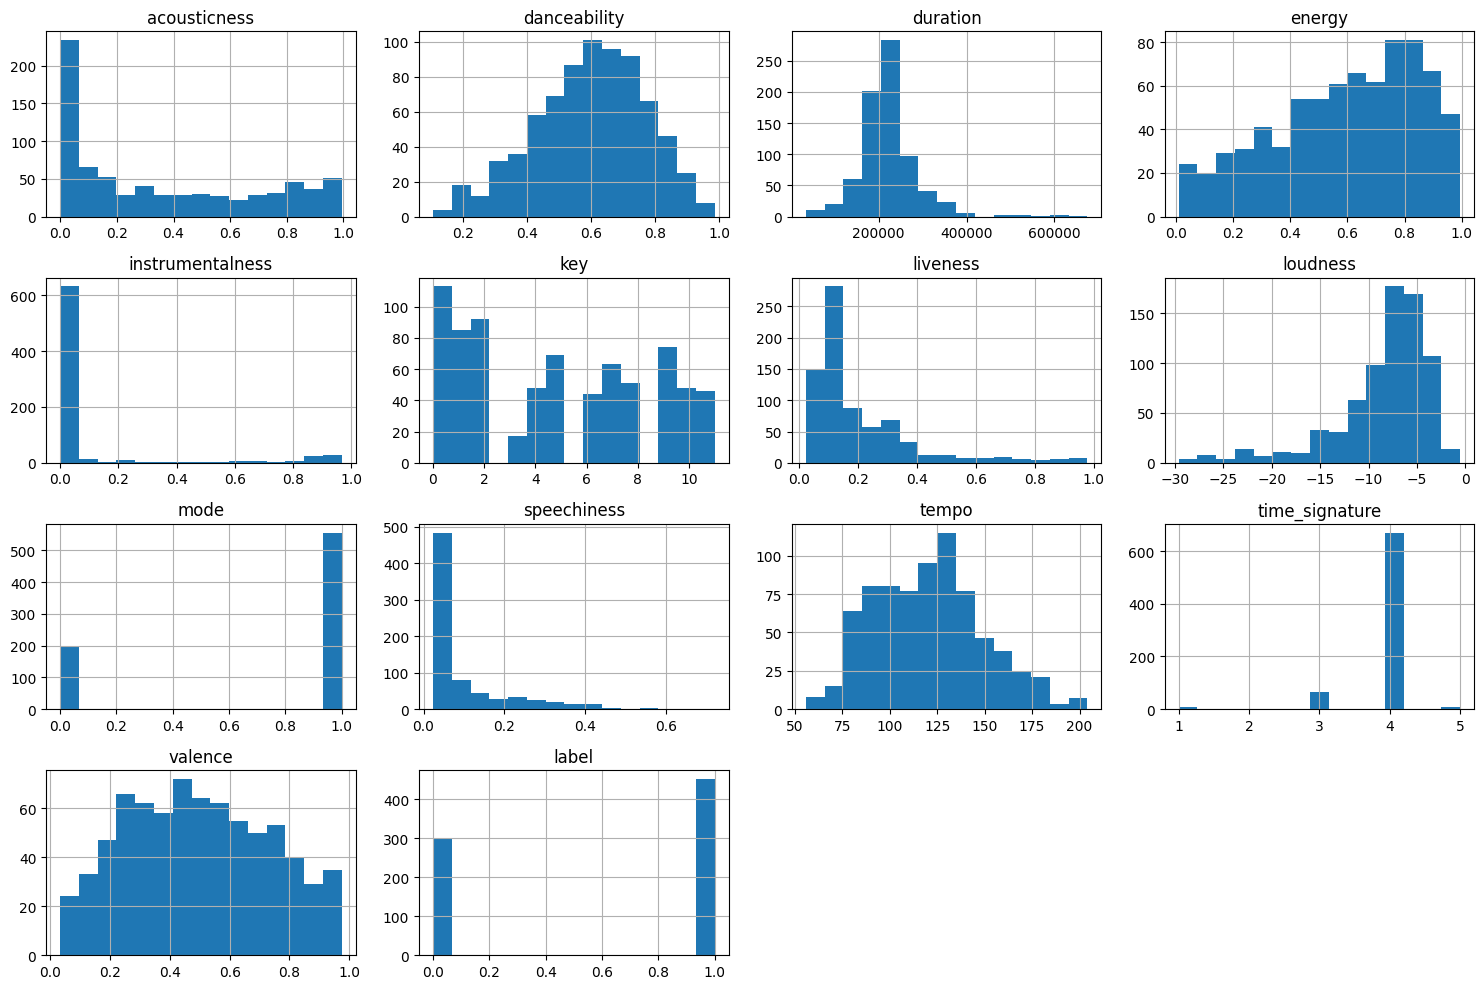

In [34]:
import matplotlib.pyplot as plt

# Plot histograms for each numerical variable
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Creating histograms for numerical variables
df[numerical_columns].hist(bins=15, figsize=(15, 10), layout=(4, 4))
plt.tight_layout()
plt.show()


In [35]:
df.describe()

,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,label
count,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000
mean,0.357394,0.596439,220112.733333,0.594188,0.100245,4.829333,0.203376,-8.509339,0.741333,0.098966,120.405761,3.902667,0.497321,0.602667
std,0.338405,0.172036,65587.690483,0.253301,0.259921,3.636001,0.177609,5.039488,0.438194,0.104715,28.378116,0.400091,0.239615,0.489673
min,0.000001,0.107000,33840.000000,0.009250,0.000000,0.000000,0.024000,-29.601000,0.000000,0.023400,55.747000,1.000000,0.033200,0.000000
25%,0.037150,0.480000,185490.250000,0.423250,0.000000,1.000000,0.094550,-10.173500,0.000000,0.035900,98.998000,4.000000,0.297000,0.000000
50%,0.244500,0.606000,215108.500000,0.631500,0.000010,5.000000,0.129000,-7.270000,1.000000,0.048750,120.104500,4.000000,0.483000,1.000000
75%,0.678500,0.715750,244236.750000,0.804750,0.002245,8.000000,0.264750,-5.097750,1.000000,0.113000,138.074750,4.000000,0.684500,1.000000
max,0.994000,0.986000,675360.000000,0.995000,0.967000,11.000000,0.979000,-0.533000,1.000000,0.721000,204.162000,5.000000,0.975000,1.000000


##### ***Observations***

- ***Total*** are 750
- ***'label'*** is our ***prediction***, with 1 as likekable  and 0 as Non likekable.
- ***Key*** is a categorical value with numbers from 0 to 11
- ***acoustiness, danceability, energy, instrumentalness, liveness, speechiness, and valence*** are **continous** variables that goes up till 1 
- About **60%** of the tracks are ***likeable***
- ***Mode*** is categorical between 1 or 0 indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0, the tracks in major are 74% of this set. 
- Most of the time signature ranges in 4 (> 75%) 
- Most of the tracks duration ranges in 244236(> 75%) these are miliseconds, that transformed to minutes are about 4 minutes. 
- ***valence*** describing the musical positiveness conveyed by a track. Tracks with high valence sound more ***positive (e.g. happy, cheerful, euphoric)***, while tracks with low valence sound more ***negative (e.g. sad, depressed, angry)***, (> 75%) of the tracks are onto 0.68 


**Input Variables**

 Numerical:
- acousticness
- danceability
- duration
- energy
- instrumentalness
- liveness	
- loudness	
- speechiness
- tempo
- valence

Categorical:
- key
- mode
- time_signature

**Output Variable**
- label

#### 3.2 Variable Analysis: Numerical

***Key Relatioships***

We want to know how well each feature correlates with the track being liked. We want to do this early in our project and match these quick correlations to correlations modeled later in the project.

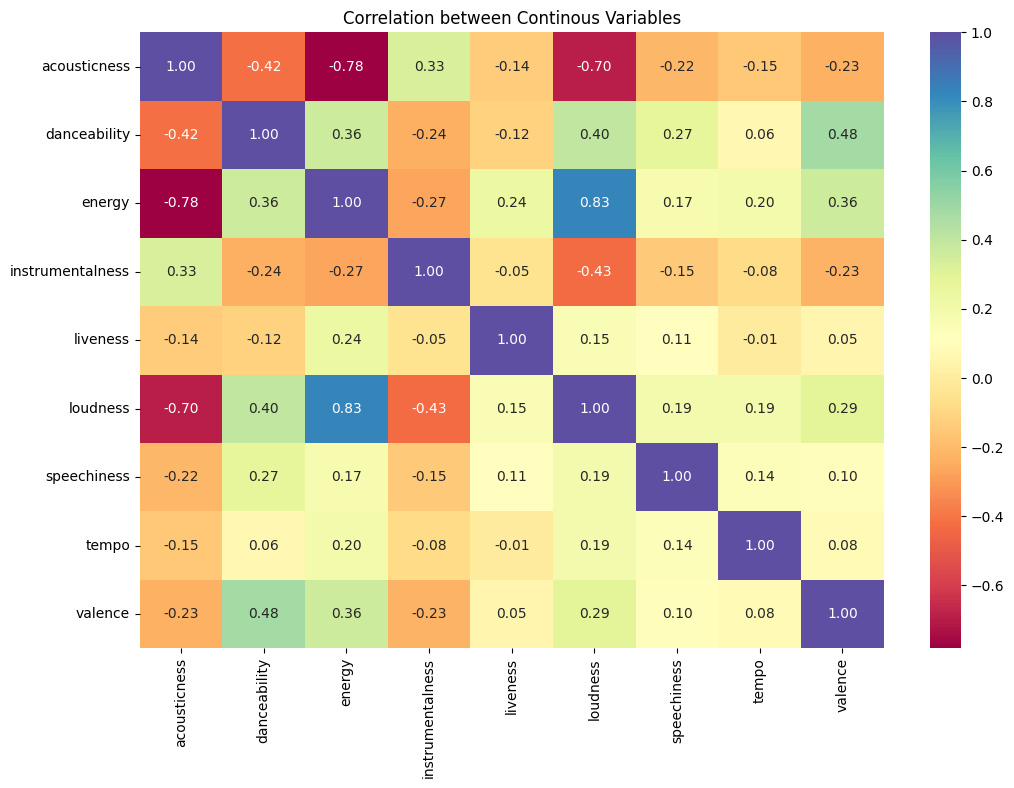

In [36]:
# Heatmap correlation just for continues variables
continous_columns = df.select_dtypes(include=['float64']).columns                                     
plt.figure(figsize=(12,8))
sns.heatmap(df[continous_columns].corr(), annot=True, cmap='Spectral', fmt='.2f')
plt.title("Correlation between Continous Variables")
plt.show()
 

#### 3.2 Variable Analysis: Categorical

Analyze cardinality (the number of unique categories).
Examine the frequency distribution of each category.

This analysis is important because it can inform decisions on how to treat these variables in modeling (e.g., one-hot encoding or ordinal encoding).

In [37]:
# List of categorical variables
categorical_features = ['key', 'mode', 'time_signature']

# Analyze cardinality and frequency distribution for each categorical variable
for feature in categorical_features:
    cardinality = df[feature].nunique()  # Number of unique categories
    frequency_distribution = df[feature].value_counts()  # Frequency distribution
    
    print(f"Feature: {feature}")
    print(f"Cardinality: {cardinality}")
    print("Frequency Distribution:")
    print(frequency_distribution)
    print("\n" + "="*40 + "\n")

Feature: key
Cardinality: 12
Frequency Distribution:
key
0     113
2      92
1      85
9      74
5      69
7      63
8      51
4      48
10     48
11     46
6      44
3      17
Name: count, dtype: int64


Feature: mode
Cardinality: 2
Frequency Distribution:
mode
1    556
0    194
Name: count, dtype: int64


Feature: time_signature
Cardinality: 4
Frequency Distribution:
time_signature
4    671
3     64
5      9
1      6
Name: count, dtype: int64




**Key**
cardinality: 12 representing the 12 musical keys. Distribution: the most frequent key is 0 (C) with 113 occurrences, while the least frequent is 3 (D♯/E♭) with 17 occurrences. This suggests some ***musical keys are more common than others**.

**Mode:**
Cardinality: 2 (Minor = 0, Major = 1). Major mode is much more frequent, with 556 instances, compared to 194 instances in Minor mode. we observe imbalance between Major and Minor modes.

**Time Signature:** cardinality: 4, distribution: The majority of tracks ***(671 out of 750)*** have a 4/4 time signature, which is the most common in popular music. Other time signatures like 3/4, 5/4, and 1/4 are much less frequent, indicating that 4/4 dominates the dataset.

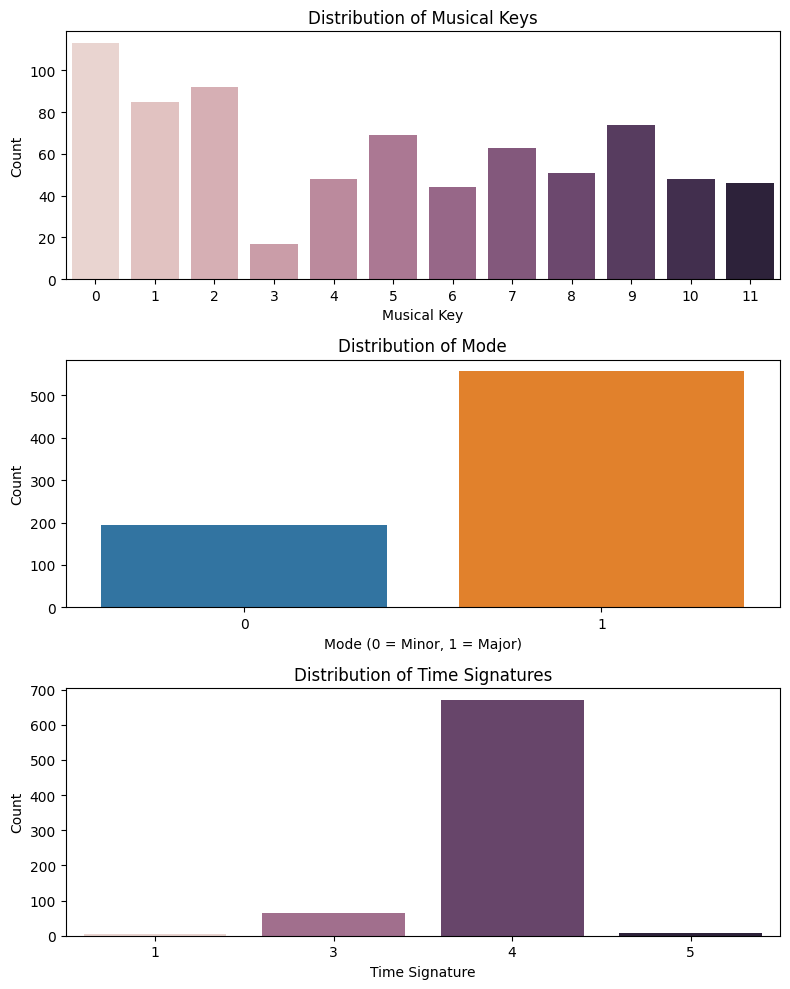

In [56]:
# Set up the figure and axes for the subplots
fig, axes = plt.subplots(3, 1, figsize=(8, 10))

# Plot distribution of 'key'
sns.countplot(x='key', hue='key', data=df, ax=axes[0], legend=False)
axes[0].set_title("Distribution of Musical Keys")
axes[0].set_xlabel("Musical Key")
axes[0].set_ylabel("Count")

# Plot distribution of 'mode'
sns.countplot(x='mode', hue='mode', data=df, ax=axes[1], legend=False)
axes[1].set_title("Distribution of Mode")
axes[1].set_xlabel("Mode (0 = Minor, 1 = Major)")
axes[1].set_ylabel("Count")

# Plot distribution of 'time_signature'
sns.countplot(x='time_signature', hue='time_signature', data=df, ax=axes[2], legend=False)
axes[2].set_title("Distribution of Time Signatures")
axes[2].set_xlabel("Time Signature")
axes[2].set_ylabel("Count")

# Adjust the layout
plt.tight_layout()
plt.show()

#### 3.2 Variable Analysis: Composite

**key + mode**


In [38]:
# Map 'mode' to 'Minor' and 'Major' 
df['mode_label'] = df['mode'].map({0: 'Minor', 1: 'Major'})

# Check the result to ensure the mapping worked correctly
print(df[['mode', 'mode_label']].head())

   mode mode_label
0     0      Minor
1     1      Major
2     1      Major
3     1      Major
4     0      Minor


In [39]:
like_rate = df.groupby(['mode_label'])[['label']].mean()
print(like_rate)


               label
mode_label          
Major       0.625899
Minor       0.536082


Even though the key, mode, and time_signature variables are stored as numerical values, they represent categorical data. We’ll analyze their cardinality and the distribution of categories.



In [40]:
# Mapping the 'key' integers to their corresponding pitch class notation
key_map = {
    -1: 'No Key',
    0: 'C',
    1: 'C♯/D♭',
    2: 'D',
    3: 'D♯/E♭',
    4: 'E',
    5: 'F',
    6: 'F♯/G♭',
    7: 'G',
    8: 'G♯/A♭',
    9: 'A',
    10: 'A♯/B♭',
    11: 'B'
}

# Apply the mapping to create the 'key_label' column
df['key_label'] = df['key'].map(key_map)

# Verify the mapping
print(df[['key', 'key_label']].head())

   key key_label
0    8     G♯/A♭
1    4         E
2    5         F
3    5         F
4    6     F♯/G♭


In [55]:
import plotly.graph_objects as go
import plotly.express as px

# Define the nodes (Keys, Modes, and Labels)
all_labels = list(df['key_label'].unique()) + ['Major', 'Minor', 'Liked', 'Not Liked']

# Set the indexes for the nodes (key -> mode -> label)
key_labels = list(df['key_label'].unique())  # Musical Keys (first group of nodes)
modes = ['Major', 'Minor']  # Modes (second group of nodes)
labels = ['Liked', 'Not Liked']  # Output Labels (third group of nodes)

# Define source and target mappings (Key -> Mode -> Label)
# Create empty lists for sources, targets, values, and colors
sources = []
targets = []
values = []
colors = []

# Use a Plotly color palette
color_palette = px.colors.qualitative.Plotly

# Fill source, target, and color lists
for idx, key in enumerate(key_labels):
    # Key -> Mode (major or minor)
    major_count = df[(df['key_label'] == key) & (df['mode_label'] == 'Major')].shape[0]
    minor_count = df[(df['key_label'] == key) & (df['mode_label'] == 'Minor')].shape[0]
    
    if major_count > 0:
        sources.append(all_labels.index(key))  # Index of the key
        targets.append(all_labels.index('Major'))  # Index of the mode 'Major'
        values.append(major_count)  # Count of tracks with major mode
        colors.append(color_palette[idx % len(color_palette)])  # Assign color from palette
    
    if minor_count > 0:
        sources.append(all_labels.index(key))  # Index of the key
        targets.append(all_labels.index('Minor'))  # Index of the mode 'Minor'
        values.append(minor_count)  # Count of tracks with minor mode
        colors.append(color_palette[idx % len(color_palette)])  # Assign color from palette

    # Now Mode -> Label (Liked or Not Liked)
    major_liked = df[(df['key_label'] == key) & (df['mode_label'] == 'Major') & (df['label'] == 1)].shape[0]
    major_not_liked = df[(df['key_label'] == key) & (df['mode_label'] == 'Major') & (df['label'] == 0)].shape[0]
    minor_liked = df[(df['key_label'] == key) & (df['mode_label'] == 'Minor') & (df['label'] == 1)].shape[0]
    minor_not_liked = df[(df['key_label'] == key) & (df['mode_label'] == 'Minor') & (df['label'] == 0)].shape[0]

    if major_liked > 0:
        sources.append(all_labels.index('Major'))
        targets.append(all_labels.index('Liked'))
        values.append(major_liked)
        colors.append(color_palette[-1])  # Assign color for liked

    if major_not_liked > 0:
        sources.append(all_labels.index('Major'))
        targets.append(all_labels.index('Not Liked'))
        values.append(major_not_liked)
        colors.append(color_palette[-2])  # Assign color for not liked

    if minor_liked > 0:
        sources.append(all_labels.index('Minor'))
        targets.append(all_labels.index('Liked'))
        values.append(minor_liked)
        colors.append(color_palette[-1])  # Assign color for liked

    if minor_not_liked > 0:
        sources.append(all_labels.index('Minor'))
        targets.append(all_labels.index('Not Liked'))
        values.append(minor_not_liked)
        colors.append(color_palette[-2])  # Assign color for not liked

# Create the Sankey diagram
fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=all_labels,
        color="lightgrey",  # Node color for all nodes
    ),
    link=dict(
        source=sources,
        target=targets,
        value=values,
        color=colors  # Use the assigned color palette for links
    )
))

# Add title and display
fig.update_layout(title_text="Sankey Diagram: Key → Mode → Label (Liked/Not Liked)", font_size=10)
fig.show()


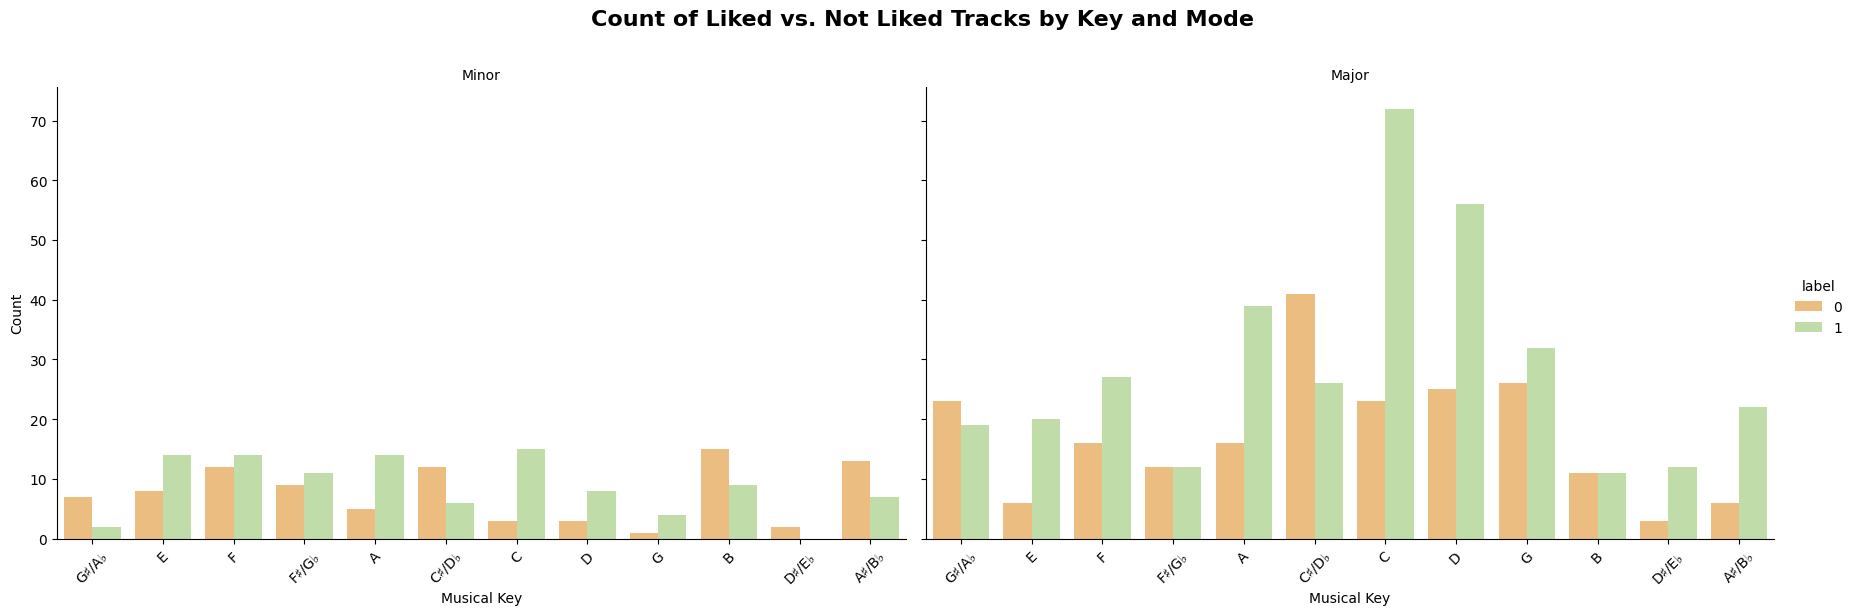

In [42]:
g = sns.catplot(x="key_label", hue="label", col="mode_label", data=df, kind="count", height=6, aspect=1.5, palette='Spectral')
g.set_xticklabels(rotation=45)
g.set_axis_labels("Musical Key", "Count")
g.set_titles("{col_name}")
g.fig.suptitle('Count of Liked vs. Not Liked Tracks by Key and Mode', fontsize=16, fontweight='bold')
g.fig.subplots_adjust(top=0.85)  # Adjust title position
plt.show()


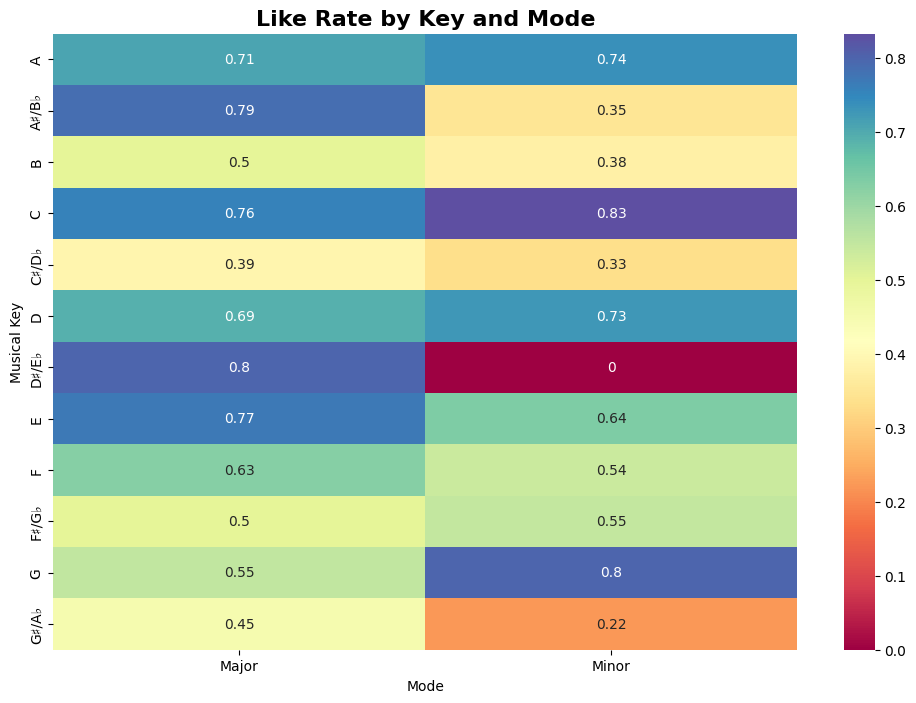

In [48]:

# Calculate the like rate for each key and mode combination
like_rate = df.pivot_table(index='key_label', columns='mode_label', values='label', aggfunc='mean')

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(like_rate, annot=True, cmap='Spectral', cbar=True)
plt.title('Like Rate by Key and Mode', fontweight='bold', fontsize=16)
plt.xlabel('Mode')
plt.ylabel('Musical Key')
plt.show()

In [44]:
# Compare the like rates within each mode separately
major_like_rate = df[df['mode_label'] == 'Major'].groupby('key_label')['label'].mean()
minor_like_rate = df[df['mode_label'] == 'Minor'].groupby('key_label')['label'].mean()

print("Major Like Rates:\n", major_like_rate)
print("Minor Like Rates:\n", minor_like_rate)

Major Like Rates:
 key_label
A        0.709091
A♯/B♭    0.785714
B        0.500000
C        0.757895
C♯/D♭    0.388060
D        0.691358
D♯/E♭    0.800000
E        0.769231
F        0.627907
F♯/G♭    0.500000
G        0.551724
G♯/A♭    0.452381
Name: label, dtype: float64
Minor Like Rates:
 key_label
A        0.736842
A♯/B♭    0.350000
B        0.375000
C        0.833333
C♯/D♭    0.333333
D        0.727273
D♯/E♭    0.000000
E        0.636364
F        0.538462
F♯/G♭    0.550000
G        0.800000
G♯/A♭    0.222222
Name: label, dtype: float64


In [45]:
emotions_df = df.groupby(["mode_label", "key_label"]).agg("mean")
emotions_df

acousticness  danceability       duration    energy  \
mode_label key_label                                                        
Major      A              0.376741      0.579455  219609.490909  0.572311   
           A♯/B♭          0.528452      0.570071  215952.392857  0.486182   
           B              0.269990      0.654409  223809.318182  0.697682   
           C              0.448872      0.581716  209466.652632  0.557456   
           C♯/D♭          0.235113      0.622090  232789.567164  0.649715   
           D              0.409743      0.577395  221192.654321  0.538420   
           D♯/E♭          0.575400      0.544600  254302.266667  0.520273   
           E              0.427431      0.596769  215449.730769  0.536692   
           F              0.491416      0.568093  211415.465116  0.476479   
           F♯/G♭          0.271011      0.614792  215295.625000  0.711500   
           G              0.321519      0.594207  224330.310345  0.597879   
           G♯/A♭          0.287601      0.596333  213748.357143  0.650033   
Minor      A              0.615137      0.580053  242512.263158  0.472358   
           A♯/B♭          0.278373      0.608000  199441.700000  0.720245   
           B              0.140160      0.703125  206617.458333  0.677333   
           C              0.416216      0.543833  220116.888889  0.516589   
           C♯/D♭          0.227677      0.665667  193425.555556  0.721389   
           D              0.505452      0.483636  191313.272727  0.544900   
           D♯/E♭          0.055290      0.581000  223316.500000  0.574000   
           E              0.349727      0.592682  253872.090909  0.599886   
           F              0.181024      0.660615  234154.423077  0.687312   
           F♯/G♭          0.243341      0.600550  241003.800000  0.633630   
           G              0.127412      0.621000  212610.800000  0.833000   
           G♯/A♭          0.123678      0.596667  205931.333333  0.759222   

                      instrumentalness   key  liveness   loudness  mode  \
mode_label key_label                                                      
Major      A                  0.089304   9.0  0.168916  -9.152745   1.0   
           A♯/B♭              0.104385  10.0  0.219264 -11.903000   1.0   
           B                  0.039357  11.0  0.159064  -6.416318   1.0   
           C                  0.098556   0.0  0.220966  -8.458179   1.0   
           C♯/D♭              0.061132   1.0  0.221554  -6.860313   1.0   
           D                  0.143141   2.0  0.183611  -9.734951   1.0   
           D♯/E♭              0.151008   3.0  0.169600 -10.842267   1.0   
           E                  0.082544   4.0  0.179850  -8.921346   1.0   
           F                  0.088287   5.0  0.185379  -9.730302   1.0   
           F♯/G♭              0.072810   6.0  0.279033  -6.369250   1.0   
           G                  0.102206   7.0  0.218869  -8.472000   1.0   
           G♯/A♭              0.079867   8.0  0.178145  -7.714143   1.0   
Minor      A                  0.405784   9.0  0.144889 -11.551105   0.0   
           A♯/B♭              0.051754  10.0  0.224495  -6.887750   0.0   
           B                  0.029512  11.0  0.189504  -6.644917   0.0   
           C                  0.168339   0.0  0.211311 -10.060500   0.0   
           C♯/D♭              0.102293   1.0  0.238522  -6.536611   0.0   
           D                  0.268567   2.0  0.167018 -10.546727   0.0   
           D♯/E♭              0.000576   3.0  0.237500  -8.220500   0.0   
           E                  0.060584   4.0  0.287959  -9.227545   0.0   
           F                  0.026224   5.0  0.210831  -7.019308   0.0   
           F♯/G♭              0.049544   6.0  0.221745  -8.124850   0.0   
           G                  0.046280   7.0  0.195820  -4.398000   0.0   
           G♯/A♭              0.186197   8.0  0.155444  -5.926111   0.0   

                      speechiness       tempo  time_signature   vale

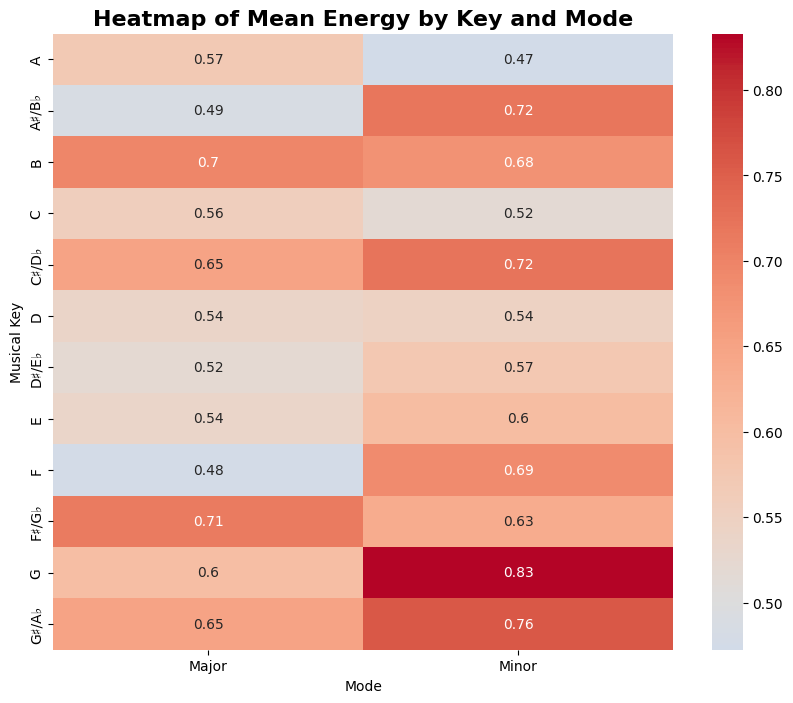

In [46]:
# Pivot the DataFrame for the heatmap
pivot_df = emotions_df.pivot_table(index='key_label', columns='mode_label', values='energy')

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_df, annot=True, cmap='coolwarm', center=0.5)
plt.title('Heatmap of Mean Energy by Key and Mode', fontsize=16, fontweight='bold')
plt.xlabel('Mode')
plt.ylabel('Musical Key')
plt.show()


/var/folders/zy/0qz97zt97vj07vpx_gz3j8qh0000gn/T/ipykernel_4583/2496763827.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




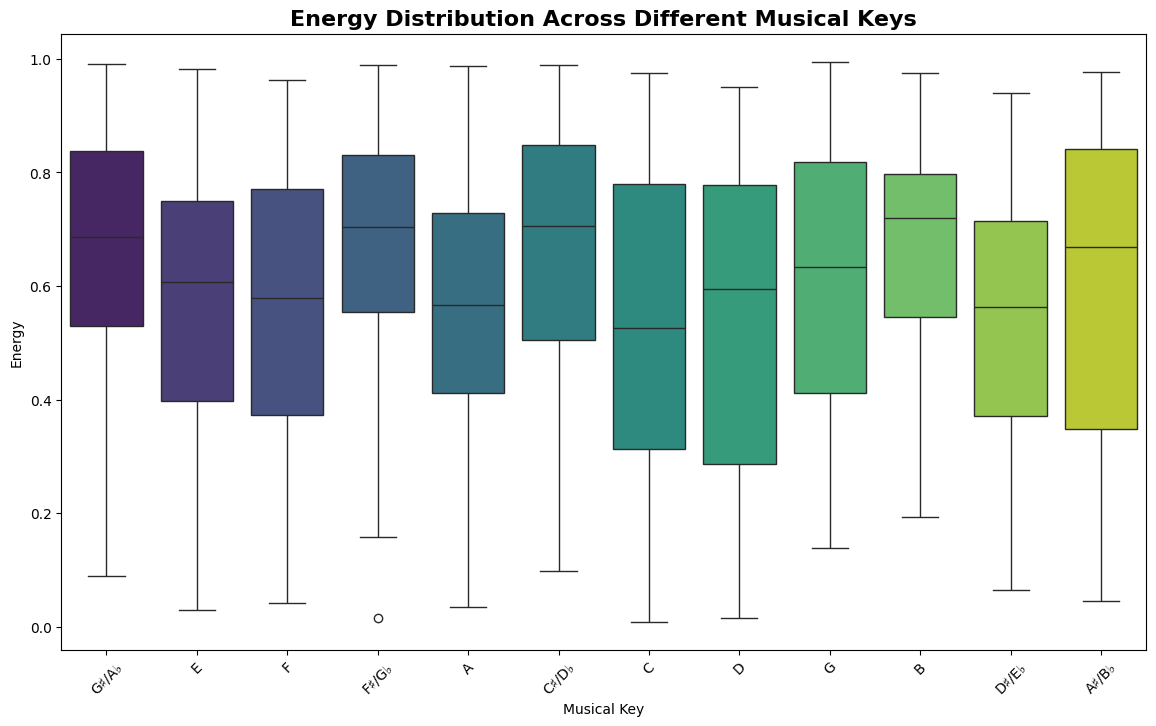

In [47]:
# Boxplot of energy distribution across different keys
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='key_label', y='energy', palette='viridis')
plt.title('Energy Distribution Across Different Musical Keys', fontsize=16, fontweight='bold')
plt.xlabel('Musical Key')
plt.ylabel('Energy')
plt.xticks(rotation=45)
plt.show()
